## WEB Scraping menggunakan Phyton (BeautifulSoup)

Proyek ini melakukan ekstraksi data(scrap) dari website https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY. Data dalam bentuk HTML akan diolah dengan menggunakan package BeautifulSoup dan akan divisualisasi menggunakan matplotlib. Dengan catatan, website ini diredirec ke https://news.mifx.com/kurs-valuta-asing?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019.

In [140]:
#Daftar Package yang digunakan
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import dateparser

ModuleNotFoundError: No module named 'dateparser'

In [85]:
#syntax ini bertujuan untuk mengirimkan request http menggunakan Python
url_get = requests.get('https://news.mifx.com/kurs-valuta-asing?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019')

In [88]:
#data dalam format html atau xml dari link di atas, di parsing ke variable soup
soup = BeautifulSoup(url_get.content,"html.parser")

In [90]:
# syntax ini digunakan untuk mengecek hasil parsing html yang diperoleh
# dan melakukan filter html data yang memiliki tag <table></table> dengan urutan ke 3 (index=2).
# pada halaman website tersebut terdapat beberapa table, hasil filter ditampung pada variable "table_result"
table_result = soup.find_all('table')[2]
print(table_result.prettify()[:400])  #digunakan untuk menampilkan sebagian data html sehingga lebih mudah dibaca

<table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
 <tr class="colorWhite fontsize14 firstRow">
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   31 Desember 2019
  </td>
  <td>
   128,62
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr>
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>



In [122]:
#data html yang sudah di filter dikonversi menjadi dataframe(df) agar dapat diolah lebih lanjut menggunakan pandas
#read_html adalah methode yang dapat digunakan untuk melakukan konversi langsung html ke dataframe.
df = pd.read_html(str(table_result))[0] 
# mengubah nama kolom table_result dimana index 0:Tanggal 1: ASK 2:BID
df.rename(columns={0:'TANGGAL',1:'JUAL',2:'BELI'},inplace=True)  
df.drop([0], inplace = True) #menghapus baris pertama, karena merupakan judul kolom di HTML(bukan bagian data kurs)
df.head()

,TANGGAL,JUAL,BELI
1,31 Desember 2019,12862,12732
2,30 Desember 2019,12830,12702
3,27 Desember 2019,12811,12683
4,26 Desember 2019,12827,12698
5,23 Desember 2019,12839,12710


In [123]:
df.dtypes # melakukan pengecekan jenis variable yang digunakan masih berupa object

TANGGAL    object
JUAL       object
BELI       object
dtype: object

In [124]:
#Mengubah data harga jual & beli menjadi float
df[['JUAL','BELI']]= df[['JUAL','BELI']].astype('float')
#Membagi data harga jual & beli menjadi 2 dibelakang koma (dibagi 100)
df['JUAL'] = df['JUAL']/100
df['BELI'] = df['BELI']/100

In [131]:
# digunakan untuk menganalisa hasil statistik dasar dari data kurs pada kolom JUAL.
# Terdapat beberapa data pencilan atas dan bawah
# Kondisi keseluruhan data relatif normal karena Q1 & Q3 masih dalam range mean +standar deviasi
df.JUAL.describe()

count    246.000000
mean     130.523293
std        2.237668
min      125.840000
25%      128.725000
50%      130.215000
75%      132.027500
max      136.200000
Name: JUAL, dtype: float64

In [127]:
# digunakan untuk menganalisa hasil statistik dasar dari data kurs pada kolom BELI.
# Terdapat beberapa data pencilan atas dimana mean + standard deviasi lebih kecil dibanding nilai maksimum 
# Kondisi keseluruhan data normal karena Q1 & Q3 masih dalam range mean +standar deviasi
df.BELI.describe()

count    246.000000
mean     129.196667
std        2.213848
min      124.550000
25%      127.407500
50%      128.895000
75%      130.687500
max      134.810000
Name: BELI, dtype: float64

In [132]:
# digunakan untuk menganalisa hasil statistik dasar dari data kurs seluruh data pada dataframe df.
# Kondisi keseluruhan data normal karena Q1 & Q3 masih dalam range mean +standar deviasi
df.BELI.describe()

count    246.000000
mean     129.196667
std        2.213848
min      124.550000
25%      127.407500
50%      128.895000
75%      130.687500
max      134.810000
Name: BELI, dtype: float64

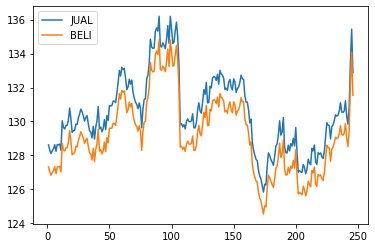

In [133]:
df.plot.line()